From the boostrapping scan files, find the direction with highest n_sigma and find the closest direction in best fit, after which we find the amplitude of H0 variation in the best fit.

# Visualization

In [1]:
# load saved data
import pandas as pd
file_path = '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare_scatter.csv'
data = pd.read_csv(file_path)

data['Delta_H0'] *= 100
data

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,7.385356,2.313296,-50.827893,13.043280,0
1,$L_\mathrm{{X}}-T$,4.285675,0.819068,-92.000000,28.000000,1
2,$L_\mathrm{{X}}-T$,6.973058,1.568688,123.220741,9.655936,2
3,$L_\mathrm{{X}}-T$,10.125532,2.136278,120.000000,-37.000000,3
4,$L_\mathrm{{X}}-T$,9.334221,2.057144,69.911098,-32.693093,4
...,...,...,...,...,...,...
1894,$Y_\mathrm{{SZ}}-T$,8.533592,2.281843,142.807876,-28.879094,945
1895,$Y_\mathrm{{SZ}}-T$,9.695020,2.553896,96.000000,34.000000,946
1896,$Y_\mathrm{{SZ}}-T$,6.239494,1.514066,40.000000,26.000000,947
1897,$Y_\mathrm{{SZ}}-T$,7.267272,1.661012,-76.000000,-44.000000,948


In [2]:
# Check data completeness
print(len(data[data['Relations']=='$Y_\\mathrm{{SZ}}-T$']),
      len(data[data['Relations']=='$M_\\mathrm{{gas}}-T$']),
      len(data[data['Relations']=='$L_\\mathrm{{X}}-T$']),
)

949 0 950


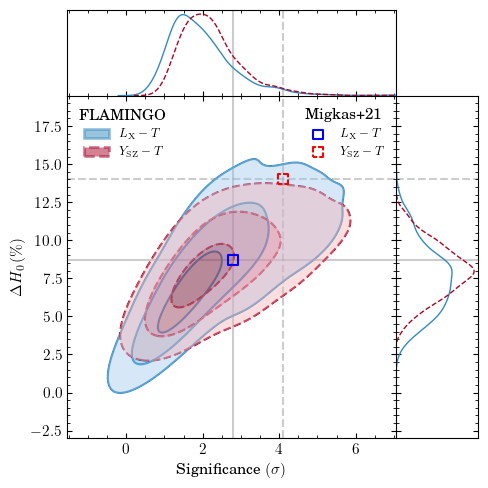

In [ ]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')

# set y lim manually. The ylim argument in jointgrid stretch the histogram
# data = data[data['$\\Delta H_0\\,(\\%)$'] < 25]  

colors = ['#348ABD', '#A60628']
linestyles = ['solid', '--']  # solid, densely dashed, densely dashdotdotted https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

# Create the 2D KDE plot
g = sns.JointGrid(data=data, 
                  x='Significance',
                  y='Delta_H0', 
                  hue='Relations',
                  space=0,
                  ratio=4,
                  height=5,
                  xlim=(-1.55, 7.05),
                  ylim=(-3, 19.5),
                  )

# kde plot missing 3rd level contour if use g.plot_joint, for unknown reason
for relation, color, linestyle in zip(['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$'], 
                            colors, linestyles):

    # Line contours    
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance',
                y='Delta_H0', 
                #hue='Relations',
                color=color,
                fill=False, 
                levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                bw_adjust=1.8,
                zorder=1,
                linestyles=linestyle,
                linewidths=1.5,
                ax=g.ax_joint
                )

    # Filled contours
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance',
                y='Delta_H0', 
                #hue='Relations',
                color=color,
                fill=True, 
                levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                bw_adjust=1.8,
                zorder=2,
                alpha=0.4,
                ax=g.ax_joint,
                )

    # Marginal histograms
    sns.kdeplot(data=data[data['Relations'] == relation], 
                x='Significance',
                fill=False,
                color=color,
                linestyle=linestyle,
                ax=g.ax_marg_x
    )
   
    sns.kdeplot(data=data[data['Relations'] == relation], 
                y='Delta_H0',
                fill=False,
                color=color,
                linestyle=linestyle,
                ax=g.ax_marg_y,
    )
# M21 results
x_point = 2.8 # 2.4
y_point = 8.7
g.refline(x=x_point, y=y_point, linestyle=linestyles[0], color='grey', linewidth=1.5, alpha=0.4, zorder=0)
line0 = g.ax_joint.scatter(x_point, y_point, marker='s', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='b', linestyle=linestyles[0],
    label='$L_\\mathrm{{X}}-T$', zorder=10)

#g.ax_joint.axhspan(ymin=8.7-3.1, ymax=8.7+3.1, color='tab:blue', alpha=0.2, zorder=0)

x_point = 4.1 # 2.6
y_point = 14
g.refline(x=x_point, y=y_point, linestyle=linestyles[1], color='grey', linewidth=1.5, alpha=0.4, zorder=0)
line1 = g.ax_joint.scatter(x_point, y_point, marker='s', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='r', linestyle=(2, (4, 1)),
    label='$Y_\\mathrm{{SZ}}-T$', zorder=10)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# # matplotlib doesn't detect the contour correctly, adding it manually
# import matplotlib.patches as mpatches
# contour = mpatches.Patch(color='tab:blue', label='$Y_\\mathrm{{SZ}}-T$')
g.ax_marg_x.legend(handles=[line0, line1], title='Migkas+21', loc='upper right', bbox_to_anchor=(1,0), fontsize=9) # put right corner at 1,0

#sns.move_legend(g.ax_joint, loc='upper right', bbox_to_anchor=(1.7, 0.75), title='FLAMINGO')
from matplotlib.patches import Patch
# Create custom legend for contours
contour_legend_elements = [Patch(facecolor=colors[0], edgecolor=colors[0], linestyle=linestyles[0], linewidth=2, label='$L_\\mathrm{X}-T$', alpha=0.5),
                           Patch(facecolor=colors[1], edgecolor=colors[1], linestyle=linestyles[1], linewidth=2, label='$Y_\\mathrm{SZ}-T$', alpha=0.5)]

# Add the custom legend for contours
g.ax_joint.legend(handles=contour_legend_elements, title='FLAMINGO', loc='upper left', fontsize=9)

g.set_axis_labels('Significance $(\\sigma)$', '$\\Delta H_0\\,(\\%)$')
# plt.savefig('./to_paper/h0_scan_hist_LTYTMT_scatter.pdf', bbox_inches='tight')
# Show the plot
plt.show()


## KDE estimation

In [2]:
# load saved data
import pandas as pd
file_path = '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare_scatter.csv'
data = pd.read_csv(file_path)

data['Delta_H0'] *= 100
data

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,7.385356,2.313296,-50.827893,13.043280,0
1,$L_\mathrm{{X}}-T$,4.285675,0.819068,-92.000000,28.000000,1
2,$L_\mathrm{{X}}-T$,6.973058,1.568688,123.220741,9.655936,2
3,$L_\mathrm{{X}}-T$,10.125532,2.136278,120.000000,-37.000000,3
4,$L_\mathrm{{X}}-T$,9.334221,2.057144,69.911098,-32.693093,4
...,...,...,...,...,...,...
3444,$Y_\mathrm{{SZ}}-T$,8.249033,2.313997,-8.000000,2.000000,1723
3445,$Y_\mathrm{{SZ}}-T$,6.574890,2.730992,72.000000,56.000000,1724
3446,$Y_\mathrm{{SZ}}-T$,8.320368,1.877766,20.000000,16.000000,1725
3447,$Y_\mathrm{{SZ}}-T$,10.060892,2.831550,-124.000000,34.000000,1726


In [3]:
# Lx-T
dataset = data[data['Relations']=='$L_\\mathrm{{X}}-T$'][['Delta_H0', 'Significance']]

import numpy as np
import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values)

x_grid = np.linspace(-15, 40, 500)
y_grid = np.linspace(-5, 21, 500)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([8.7, 2.8])
prob = kde(point)*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0])
prob_mass = Z*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])
print(np.sum(prob_mass))
print(prob_above, prob_below)
print(1-prob_above)
# print(np.sqrt(-2*np.log(1-prob_above)))

(2, 1725)
(500, 500)
1.0000000000000009
0.6719090810242125 0.32809091897578824
0.32809091897578746


In [5]:
# Ysz-T
dataset = data[data['Relations']=='$Y_\\mathrm{{SZ}}-T$'][['Delta_H0', 'Significance']]

import numpy as np
import scipy.stats as stats
# gaussian KDE at the point of interest
print(dataset.T.values.shape)
kde = stats.gaussian_kde(dataset.T.values)

x_grid = np.linspace(-15, 40, 500) # delta H0
y_grid = np.linspace(-6, 28, 500)  # significance
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)
print(Z.shape)
# print(Z)

# find probability mass above the point of interest
point = np.array([14, 4.1])
prob = kde(point)*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0])
prob_mass = Z*(x_grid[1]-x_grid[0])*(y_grid[1]-y_grid[0]) # probability mass in each bin
prob_above = np.sum(prob_mass[prob_mass > prob])
prob_below = np.sum(prob_mass[prob_mass < prob])
print(np.sum(prob_mass))
print(prob_above, prob_below)
print(1 - prob_above)
# print(np.sqrt(-2*np.log(1-prob_above)))

(2, 1724)
(500, 500)
0.9994199535962879
0.9991276521986736 0.00029230139761406805
0.0008723478013263897
